In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

In [4]:
xTrain = np.load('xTrain.npy', allow_pickle=True)
yTrain = np.load('yTrain.npy', allow_pickle=True)
xVal = np.load('xVal.npy', allow_pickle=True)
yVal = np.load('yVal.npy', allow_pickle=True)
xTest = np.load('xTest.npy', allow_pickle=True)
yTest = np.load('yTest.npy', allow_pickle=True)

xTrain = xTrain.reshape((xTrain.shape[0],25,1))
xVal = xVal.reshape((xVal.shape[0],25,1))
xTest = xTest.reshape((xTest.shape[0],25,1))

print(xTrain.shape, yTrain.shape, xVal.shape, yVal.shape, xTest.shape, yTest.shape)

(1138, 25, 1) (1138, 30) (379, 25, 1) (379, 30) (380, 25, 1) (380, 30)


In [5]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, X, y, n_classes, shuffle):
        'Initialization'
        self.X = X
        self.y = y
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return 1

    def __getitem__(self, index):
        'Generate one batch of data'
        X = self.X + 0.01*np.random.randn()
        y = self.y
        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.X))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [7]:
training_generator = DataGenerator(xTrain, yTrain, n_classes=30, shuffle=False)
validation_generator = DataGenerator(xVal, yVal, n_classes=30, shuffle=False)

#for i in range(len(training_generator)):
#    item = training_generator.__getitem__(i)
#    print(item, item[0].shape, item[1].shape)

In [8]:
inputs = Input(shape=(25, 1))
x = LSTM(128, return_sequences=True)(inputs)
x = Dropout(0.1)(x)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.1)(x)
x = Reshape((1600,))(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(30, activation="softmax")(x)

model = Model(inputs, outputs)
model.compile(optimizers=Adam(lr=0.0001), loss='categorical_crossentropy', \
    metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 25, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 64)            0         
_________________________________________________________________
reshape (Reshape)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464

In [9]:
history = model.fit_generator(training_generator, validation_data=validation_generator, \
    epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 874ms/step - loss: 3.4006 - categorical_accuracy: 0.0395 - val_loss: 3.3652 - val_categorical_accuracy: 0.1636
Epoch 2/2000
1/1 [==============================] - 1s 813ms/step - loss: 3.3702 - categorical_accuracy: 0.1371 - val_loss: 3.2701 - val_categorical_accuracy: 0.1557
Epoch 3/2000
1/1 [==============================] - 1s 834ms/step - loss: 3.2837 - categorical_accuracy: 0.1450 - val_loss: 3.1800 - val_categorical_accuracy: 0.1425
Epoch 4/2000
1/1 [==============================] - 1s 780ms/step - loss: 3.2330 - categorical_accuracy: 0.1450 - val_loss: 3.2427 - val_categorical_accuracy: 0.1319
Epoch 5/2000
1/1 [==============================] - 1s 788ms/step - loss: 3.2427 - categorical_accuracy: 0.1169 - val_loss: 3.1426 - val_categorical_accuracy: 0.1451
Epoch 6/2000
1/1 [==============================] - 1s 814ms/step - loss: 3.1727 - categorical_accuracy: 0.1248 - val_loss: 3.1358 - val_categorical_accuracy: 0.1504
Epoc

Epoch 51/2000
1/1 [==============================] - 1s 951ms/step - loss: 2.5506 - categorical_accuracy: 0.2320 - val_loss: 2.5879 - val_categorical_accuracy: 0.2190
Epoch 52/2000
1/1 [==============================] - 1s 942ms/step - loss: 2.5387 - categorical_accuracy: 0.2346 - val_loss: 2.6163 - val_categorical_accuracy: 0.2164
Epoch 53/2000
1/1 [==============================] - 1s 1s/step - loss: 2.5766 - categorical_accuracy: 0.2232 - val_loss: 2.5995 - val_categorical_accuracy: 0.2190
Epoch 54/2000
1/1 [==============================] - 1s 1s/step - loss: 2.5523 - categorical_accuracy: 0.2162 - val_loss: 2.5979 - val_categorical_accuracy: 0.2005
Epoch 55/2000
1/1 [==============================] - 1s 933ms/step - loss: 2.5684 - categorical_accuracy: 0.2267 - val_loss: 2.5775 - val_categorical_accuracy: 0.2322
Epoch 56/2000
1/1 [==============================] - 1s 1s/step - loss: 2.5110 - categorical_accuracy: 0.2337 - val_loss: 2.5615 - val_categorical_accuracy: 0.2243
Epoch 5

Epoch 101/2000
1/1 [==============================] - 1s 1s/step - loss: 2.3057 - categorical_accuracy: 0.2707 - val_loss: 2.4850 - val_categorical_accuracy: 0.2164
Epoch 102/2000
1/1 [==============================] - 1s 1s/step - loss: 2.3002 - categorical_accuracy: 0.2812 - val_loss: 2.4300 - val_categorical_accuracy: 0.2322
Epoch 103/2000
1/1 [==============================] - 1s 1s/step - loss: 2.3285 - categorical_accuracy: 0.2759 - val_loss: 2.5543 - val_categorical_accuracy: 0.2296
Epoch 104/2000
1/1 [==============================] - 1s 1s/step - loss: 2.3932 - categorical_accuracy: 0.2557 - val_loss: 2.4794 - val_categorical_accuracy: 0.2348
Epoch 105/2000
1/1 [==============================] - 1s 1s/step - loss: 2.4021 - categorical_accuracy: 0.2469 - val_loss: 2.4467 - val_categorical_accuracy: 0.2348
Epoch 106/2000
1/1 [==============================] - 1s 1s/step - loss: 2.3208 - categorical_accuracy: 0.2540 - val_loss: 2.4445 - val_categorical_accuracy: 0.2375
Epoch 107/

Epoch 151/2000
1/1 [==============================] - 1s 1s/step - loss: 2.1936 - categorical_accuracy: 0.3032 - val_loss: 2.3913 - val_categorical_accuracy: 0.2612
Epoch 152/2000
1/1 [==============================] - 1s 984ms/step - loss: 2.2200 - categorical_accuracy: 0.2935 - val_loss: 2.3650 - val_categorical_accuracy: 0.2454
Epoch 153/2000
1/1 [==============================] - 1s 945ms/step - loss: 2.1597 - categorical_accuracy: 0.2988 - val_loss: 2.3973 - val_categorical_accuracy: 0.2480
Epoch 154/2000
1/1 [==============================] - 1s 984ms/step - loss: 2.1672 - categorical_accuracy: 0.3146 - val_loss: 2.4419 - val_categorical_accuracy: 0.2137
Epoch 155/2000
1/1 [==============================] - 1s 1s/step - loss: 2.2002 - categorical_accuracy: 0.2988 - val_loss: 2.3769 - val_categorical_accuracy: 0.2533
Epoch 156/2000
1/1 [==============================] - 1s 1s/step - loss: 2.1805 - categorical_accuracy: 0.3243 - val_loss: 2.4716 - val_categorical_accuracy: 0.2084
E

Epoch 201/2000
1/1 [==============================] - 1s 1s/step - loss: 2.0659 - categorical_accuracy: 0.3506 - val_loss: 2.4794 - val_categorical_accuracy: 0.2507
Epoch 202/2000
1/1 [==============================] - 1s 1s/step - loss: 2.0834 - categorical_accuracy: 0.3155 - val_loss: 2.4099 - val_categorical_accuracy: 0.2480
Epoch 203/2000
1/1 [==============================] - 1s 987ms/step - loss: 2.1469 - categorical_accuracy: 0.3058 - val_loss: 2.3672 - val_categorical_accuracy: 0.2559
Epoch 204/2000
1/1 [==============================] - 1s 1s/step - loss: 2.1025 - categorical_accuracy: 0.3295 - val_loss: 2.4362 - val_categorical_accuracy: 0.2296
Epoch 205/2000
1/1 [==============================] - 1s 1s/step - loss: 2.1477 - categorical_accuracy: 0.2979 - val_loss: 2.3984 - val_categorical_accuracy: 0.2639
Epoch 206/2000
1/1 [==============================] - 1s 1s/step - loss: 2.1664 - categorical_accuracy: 0.3234 - val_loss: 2.3839 - val_categorical_accuracy: 0.2559
Epoch 2

Epoch 251/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9613 - categorical_accuracy: 0.3638 - val_loss: 2.2976 - val_categorical_accuracy: 0.2850
Epoch 252/2000
1/1 [==============================] - 1s 977ms/step - loss: 1.9186 - categorical_accuracy: 0.3831 - val_loss: 2.3900 - val_categorical_accuracy: 0.2612
Epoch 253/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9781 - categorical_accuracy: 0.3691 - val_loss: 2.4373 - val_categorical_accuracy: 0.2427
Epoch 254/2000
1/1 [==============================] - 1s 961ms/step - loss: 2.1358 - categorical_accuracy: 0.3111 - val_loss: 2.3569 - val_categorical_accuracy: 0.2744
Epoch 255/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9985 - categorical_accuracy: 0.3489 - val_loss: 2.3059 - val_categorical_accuracy: 0.2639
Epoch 256/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9800 - categorical_accuracy: 0.3568 - val_loss: 2.3470 - val_categorical_accuracy: 0.2612
Epoc

Epoch 301/2000
1/1 [==============================] - 1s 1s/step - loss: 2.0027 - categorical_accuracy: 0.3409 - val_loss: 2.2623 - val_categorical_accuracy: 0.2770
Epoch 302/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9108 - categorical_accuracy: 0.3858 - val_loss: 2.2849 - val_categorical_accuracy: 0.2718
Epoch 303/2000
1/1 [==============================] - 1s 965ms/step - loss: 1.8640 - categorical_accuracy: 0.4033 - val_loss: 2.2682 - val_categorical_accuracy: 0.2718
Epoch 304/2000
1/1 [==============================] - 1s 951ms/step - loss: 1.9328 - categorical_accuracy: 0.3717 - val_loss: 2.4082 - val_categorical_accuracy: 0.2586
Epoch 305/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9794 - categorical_accuracy: 0.3436 - val_loss: 2.3313 - val_categorical_accuracy: 0.2718
Epoch 306/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9337 - categorical_accuracy: 0.3699 - val_loss: 2.4411 - val_categorical_accuracy: 0.2507
Epoc

Epoch 351/2000
1/1 [==============================] - 1s 1s/step - loss: 1.8157 - categorical_accuracy: 0.4121 - val_loss: 2.2519 - val_categorical_accuracy: 0.2902
Epoch 352/2000
1/1 [==============================] - 1s 957ms/step - loss: 1.8145 - categorical_accuracy: 0.4016 - val_loss: 2.3407 - val_categorical_accuracy: 0.2586
Epoch 353/2000
1/1 [==============================] - 1s 956ms/step - loss: 1.8481 - categorical_accuracy: 0.3910 - val_loss: 2.3997 - val_categorical_accuracy: 0.2770
Epoch 354/2000
1/1 [==============================] - 1s 939ms/step - loss: 1.9432 - categorical_accuracy: 0.3735 - val_loss: 2.2759 - val_categorical_accuracy: 0.2797
Epoch 355/2000
1/1 [==============================] - 1s 993ms/step - loss: 1.9583 - categorical_accuracy: 0.3647 - val_loss: 2.3250 - val_categorical_accuracy: 0.2770
Epoch 356/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9401 - categorical_accuracy: 0.3629 - val_loss: 2.2731 - val_categorical_accuracy: 0.311

Epoch 401/2000
1/1 [==============================] - 1s 1s/step - loss: 1.9511 - categorical_accuracy: 0.3638 - val_loss: 2.2969 - val_categorical_accuracy: 0.2797
Epoch 402/2000
1/1 [==============================] - 1s 1s/step - loss: 1.8804 - categorical_accuracy: 0.3814 - val_loss: 2.3287 - val_categorical_accuracy: 0.2770
Epoch 403/2000
1/1 [==============================] - 1s 1s/step - loss: 1.8384 - categorical_accuracy: 0.3875 - val_loss: 2.2487 - val_categorical_accuracy: 0.3061
Epoch 404/2000
1/1 [==============================] - 1s 962ms/step - loss: 1.8209 - categorical_accuracy: 0.4104 - val_loss: 2.3966 - val_categorical_accuracy: 0.2823
Epoch 405/2000
1/1 [==============================] - 1s 992ms/step - loss: 1.8568 - categorical_accuracy: 0.3963 - val_loss: 2.2683 - val_categorical_accuracy: 0.2876
Epoch 406/2000
1/1 [==============================] - 1s 1s/step - loss: 1.7987 - categorical_accuracy: 0.4025 - val_loss: 2.3092 - val_categorical_accuracy: 0.2744
Epoc

Epoch 451/2000
1/1 [==============================] - 1s 1s/step - loss: 1.8132 - categorical_accuracy: 0.4112 - val_loss: 2.3322 - val_categorical_accuracy: 0.2929
Epoch 452/2000
1/1 [==============================] - 1s 1s/step - loss: 1.8244 - categorical_accuracy: 0.3875 - val_loss: 2.2038 - val_categorical_accuracy: 0.3034
Epoch 453/2000
1/1 [==============================] - 1s 875ms/step - loss: 1.7712 - categorical_accuracy: 0.4174 - val_loss: 2.2479 - val_categorical_accuracy: 0.3008
Epoch 454/2000
1/1 [==============================] - 1s 938ms/step - loss: 1.7541 - categorical_accuracy: 0.4271 - val_loss: 2.3252 - val_categorical_accuracy: 0.3008
Epoch 455/2000
1/1 [==============================] - 1s 989ms/step - loss: 1.8022 - categorical_accuracy: 0.3875 - val_loss: 2.3862 - val_categorical_accuracy: 0.2665
Epoch 456/2000
1/1 [==============================] - 1s 1s/step - loss: 1.7968 - categorical_accuracy: 0.4007 - val_loss: 2.3077 - val_categorical_accuracy: 0.2929
E

Epoch 501/2000
1/1 [==============================] - 1s 1s/step - loss: 1.8669 - categorical_accuracy: 0.3831 - val_loss: 2.3096 - val_categorical_accuracy: 0.2902
Epoch 502/2000
1/1 [==============================] - 1s 1s/step - loss: 1.7829 - categorical_accuracy: 0.4104 - val_loss: 2.2047 - val_categorical_accuracy: 0.3351
Epoch 503/2000
1/1 [==============================] - 1s 1s/step - loss: 1.7263 - categorical_accuracy: 0.4156 - val_loss: 2.2376 - val_categorical_accuracy: 0.3325
Epoch 504/2000
1/1 [==============================] - 1s 1s/step - loss: 1.6786 - categorical_accuracy: 0.4473 - val_loss: 2.2476 - val_categorical_accuracy: 0.3087
Epoch 505/2000
1/1 [==============================] - 1s 972ms/step - loss: 1.7208 - categorical_accuracy: 0.4236 - val_loss: 2.2617 - val_categorical_accuracy: 0.3061
Epoch 506/2000
1/1 [==============================] - 1s 996ms/step - loss: 1.7249 - categorical_accuracy: 0.4227 - val_loss: 2.2397 - val_categorical_accuracy: 0.3193
Epoc

Epoch 551/2000
1/1 [==============================] - 1s 1s/step - loss: 1.6297 - categorical_accuracy: 0.4675 - val_loss: 2.2764 - val_categorical_accuracy: 0.3061
Epoch 552/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5913 - categorical_accuracy: 0.4877 - val_loss: 2.2202 - val_categorical_accuracy: 0.3272
Epoch 553/2000
1/1 [==============================] - 1s 997ms/step - loss: 1.6072 - categorical_accuracy: 0.4675 - val_loss: 2.2470 - val_categorical_accuracy: 0.3325
Epoch 554/2000
1/1 [==============================] - 1s 1s/step - loss: 1.6136 - categorical_accuracy: 0.4675 - val_loss: 2.3693 - val_categorical_accuracy: 0.3087
Epoch 555/2000
1/1 [==============================] - 1s 936ms/step - loss: 1.7473 - categorical_accuracy: 0.4192 - val_loss: 2.2464 - val_categorical_accuracy: 0.3298
Epoch 556/2000
1/1 [==============================] - 1s 1s/step - loss: 1.7086 - categorical_accuracy: 0.4367 - val_loss: 2.3332 - val_categorical_accuracy: 0.3140
Epoc

Epoch 601/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5950 - categorical_accuracy: 0.4605 - val_loss: 2.2472 - val_categorical_accuracy: 0.3325
Epoch 602/2000
1/1 [==============================] - 1s 1s/step - loss: 1.6055 - categorical_accuracy: 0.4666 - val_loss: 2.2216 - val_categorical_accuracy: 0.3272
Epoch 603/2000
1/1 [==============================] - 1s 968ms/step - loss: 1.6036 - categorical_accuracy: 0.4728 - val_loss: 2.2487 - val_categorical_accuracy: 0.3298
Epoch 604/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5885 - categorical_accuracy: 0.4842 - val_loss: 2.1943 - val_categorical_accuracy: 0.3351
Epoch 605/2000
1/1 [==============================] - 1s 997ms/step - loss: 1.6009 - categorical_accuracy: 0.4649 - val_loss: 2.3245 - val_categorical_accuracy: 0.3034
Epoch 606/2000
1/1 [==============================] - 1s 1s/step - loss: 1.7429 - categorical_accuracy: 0.4271 - val_loss: 2.2474 - val_categorical_accuracy: 0.3272
Epoc

Epoch 651/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5551 - categorical_accuracy: 0.4710 - val_loss: 2.2708 - val_categorical_accuracy: 0.3351
Epoch 652/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5701 - categorical_accuracy: 0.4763 - val_loss: 2.1693 - val_categorical_accuracy: 0.3219
Epoch 653/2000
1/1 [==============================] - 1s 972ms/step - loss: 1.5869 - categorical_accuracy: 0.4666 - val_loss: 2.1968 - val_categorical_accuracy: 0.3483
Epoch 654/2000
1/1 [==============================] - 1s 862ms/step - loss: 1.5433 - categorical_accuracy: 0.4886 - val_loss: 2.2666 - val_categorical_accuracy: 0.3193
Epoch 655/2000
1/1 [==============================] - 1s 939ms/step - loss: 1.5693 - categorical_accuracy: 0.4710 - val_loss: 2.2550 - val_categorical_accuracy: 0.3061
Epoch 656/2000
1/1 [==============================] - 1s 1000ms/step - loss: 1.6909 - categorical_accuracy: 0.4376 - val_loss: 2.2814 - val_categorical_accuracy: 0.31

Epoch 701/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4931 - categorical_accuracy: 0.5123 - val_loss: 2.2434 - val_categorical_accuracy: 0.3615
Epoch 702/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5271 - categorical_accuracy: 0.5000 - val_loss: 2.2015 - val_categorical_accuracy: 0.3509
Epoch 703/2000
1/1 [==============================] - 1s 987ms/step - loss: 1.4840 - categorical_accuracy: 0.5088 - val_loss: 2.2652 - val_categorical_accuracy: 0.3351
Epoch 704/2000
1/1 [==============================] - 1s 969ms/step - loss: 1.5741 - categorical_accuracy: 0.4684 - val_loss: 2.3233 - val_categorical_accuracy: 0.3140
Epoch 705/2000
1/1 [==============================] - 1s 928ms/step - loss: 1.5708 - categorical_accuracy: 0.4754 - val_loss: 2.2315 - val_categorical_accuracy: 0.3404
Epoch 706/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5233 - categorical_accuracy: 0.4991 - val_loss: 2.1773 - val_categorical_accuracy: 0.3404
E

Epoch 751/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4602 - categorical_accuracy: 0.5255 - val_loss: 2.2228 - val_categorical_accuracy: 0.3588
Epoch 752/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4670 - categorical_accuracy: 0.5079 - val_loss: 2.2638 - val_categorical_accuracy: 0.3351
Epoch 753/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4797 - categorical_accuracy: 0.5272 - val_loss: 2.2069 - val_categorical_accuracy: 0.3351
Epoch 754/2000
1/1 [==============================] - 1s 983ms/step - loss: 1.4729 - categorical_accuracy: 0.5088 - val_loss: 2.2147 - val_categorical_accuracy: 0.3377
Epoch 755/2000
1/1 [==============================] - 1s 959ms/step - loss: 1.4269 - categorical_accuracy: 0.5395 - val_loss: 2.2267 - val_categorical_accuracy: 0.3536
Epoch 756/2000
1/1 [==============================] - 1s 991ms/step - loss: 1.4615 - categorical_accuracy: 0.5228 - val_loss: 2.3209 - val_categorical_accuracy: 0.3298
E

Epoch 801/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5447 - categorical_accuracy: 0.4798 - val_loss: 2.2228 - val_categorical_accuracy: 0.3562
Epoch 802/2000
1/1 [==============================] - 1s 1s/step - loss: 1.6458 - categorical_accuracy: 0.4543 - val_loss: 2.3501 - val_categorical_accuracy: 0.3351
Epoch 803/2000
1/1 [==============================] - 1s 1s/step - loss: 1.8079 - categorical_accuracy: 0.4262 - val_loss: 2.2440 - val_categorical_accuracy: 0.3404
Epoch 804/2000
1/1 [==============================] - 1s 997ms/step - loss: 1.5229 - categorical_accuracy: 0.4912 - val_loss: 2.1952 - val_categorical_accuracy: 0.3615
Epoch 805/2000
1/1 [==============================] - 1s 999ms/step - loss: 1.4057 - categorical_accuracy: 0.5325 - val_loss: 2.1995 - val_categorical_accuracy: 0.3509
Epoch 806/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4089 - categorical_accuracy: 0.5457 - val_loss: 2.1839 - val_categorical_accuracy: 0.3668
Epoc

Epoch 851/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3636 - categorical_accuracy: 0.5475 - val_loss: 2.2986 - val_categorical_accuracy: 0.3430
Epoch 852/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5471 - categorical_accuracy: 0.4842 - val_loss: 2.3215 - val_categorical_accuracy: 0.3008
Epoch 853/2000
1/1 [==============================] - 1s 1s/step - loss: 1.5601 - categorical_accuracy: 0.4824 - val_loss: 2.2348 - val_categorical_accuracy: 0.3509
Epoch 854/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4314 - categorical_accuracy: 0.5141 - val_loss: 2.1995 - val_categorical_accuracy: 0.3826
Epoch 855/2000
1/1 [==============================] - 1s 985ms/step - loss: 1.4391 - categorical_accuracy: 0.5228 - val_loss: 2.2141 - val_categorical_accuracy: 0.3483
Epoch 856/2000
1/1 [==============================] - 1s 982ms/step - loss: 1.6075 - categorical_accuracy: 0.4684 - val_loss: 2.2604 - val_categorical_accuracy: 0.3509
Epoc

Epoch 901/2000
1/1 [==============================] - 1s 996ms/step - loss: 1.5463 - categorical_accuracy: 0.4842 - val_loss: 2.1438 - val_categorical_accuracy: 0.3615
Epoch 902/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4073 - categorical_accuracy: 0.5255 - val_loss: 2.1613 - val_categorical_accuracy: 0.3615
Epoch 903/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3802 - categorical_accuracy: 0.5475 - val_loss: 2.1565 - val_categorical_accuracy: 0.3799
Epoch 904/2000
1/1 [==============================] - 1s 968ms/step - loss: 1.3134 - categorical_accuracy: 0.5764 - val_loss: 2.1859 - val_categorical_accuracy: 0.3536
Epoch 905/2000
1/1 [==============================] - 1s 956ms/step - loss: 1.3587 - categorical_accuracy: 0.5448 - val_loss: 2.2245 - val_categorical_accuracy: 0.3509
Epoch 906/2000
1/1 [==============================] - 1s 941ms/step - loss: 1.3840 - categorical_accuracy: 0.5325 - val_loss: 2.1727 - val_categorical_accuracy: 0.361

Epoch 951/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3973 - categorical_accuracy: 0.5299 - val_loss: 2.2276 - val_categorical_accuracy: 0.3615
Epoch 952/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4713 - categorical_accuracy: 0.4965 - val_loss: 2.3243 - val_categorical_accuracy: 0.3404
Epoch 953/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4577 - categorical_accuracy: 0.5035 - val_loss: 2.1967 - val_categorical_accuracy: 0.3509
Epoch 954/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4525 - categorical_accuracy: 0.5079 - val_loss: 2.1958 - val_categorical_accuracy: 0.3773
Epoch 955/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3421 - categorical_accuracy: 0.5562 - val_loss: 2.1269 - val_categorical_accuracy: 0.3852
Epoch 956/2000
1/1 [==============================] - 1s 999ms/step - loss: 1.2664 - categorical_accuracy: 0.5914 - val_loss: 2.1810 - val_categorical_accuracy: 0.3826
Epoch 9

Epoch 1001/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2897 - categorical_accuracy: 0.5659 - val_loss: 2.2169 - val_categorical_accuracy: 0.3958
Epoch 1002/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3180 - categorical_accuracy: 0.5598 - val_loss: 2.1180 - val_categorical_accuracy: 0.3799
Epoch 1003/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2462 - categorical_accuracy: 0.5659 - val_loss: 2.1785 - val_categorical_accuracy: 0.3615
Epoch 1004/2000
1/1 [==============================] - 1s 987ms/step - loss: 1.2427 - categorical_accuracy: 0.5712 - val_loss: 2.1492 - val_categorical_accuracy: 0.3799
Epoch 1005/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3086 - categorical_accuracy: 0.5659 - val_loss: 2.3005 - val_categorical_accuracy: 0.3641
Epoch 1006/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4738 - categorical_accuracy: 0.5018 - val_loss: 2.1554 - val_categorical_accuracy: 0.4195
E

Epoch 1051/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2575 - categorical_accuracy: 0.5835 - val_loss: 2.2298 - val_categorical_accuracy: 0.3773
Epoch 1052/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1960 - categorical_accuracy: 0.5914 - val_loss: 2.1405 - val_categorical_accuracy: 0.3799
Epoch 1053/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2116 - categorical_accuracy: 0.6046 - val_loss: 2.2073 - val_categorical_accuracy: 0.3852
Epoch 1054/2000
1/1 [==============================] - 1s 985ms/step - loss: 1.2494 - categorical_accuracy: 0.5852 - val_loss: 2.1971 - val_categorical_accuracy: 0.3668
Epoch 1055/2000
1/1 [==============================] - 1s 938ms/step - loss: 1.2451 - categorical_accuracy: 0.5844 - val_loss: 2.2430 - val_categorical_accuracy: 0.3826
Epoch 1056/2000
1/1 [==============================] - 1s 972ms/step - loss: 1.3249 - categorical_accuracy: 0.5668 - val_loss: 2.1758 - val_categorical_accuracy: 0.

Epoch 1101/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3661 - categorical_accuracy: 0.5325 - val_loss: 2.1658 - val_categorical_accuracy: 0.3931
Epoch 1102/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2735 - categorical_accuracy: 0.5615 - val_loss: 2.1877 - val_categorical_accuracy: 0.3852
Epoch 1103/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2245 - categorical_accuracy: 0.5905 - val_loss: 2.1095 - val_categorical_accuracy: 0.4011
Epoch 1104/2000
1/1 [==============================] - 1s 975ms/step - loss: 1.1485 - categorical_accuracy: 0.6098 - val_loss: 2.1428 - val_categorical_accuracy: 0.3958
Epoch 1105/2000
1/1 [==============================] - 1s 951ms/step - loss: 1.1605 - categorical_accuracy: 0.6002 - val_loss: 2.1115 - val_categorical_accuracy: 0.3931
Epoch 1106/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1998 - categorical_accuracy: 0.5914 - val_loss: 2.2005 - val_categorical_accuracy: 0.382

Epoch 1151/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2538 - categorical_accuracy: 0.5826 - val_loss: 2.1741 - val_categorical_accuracy: 0.3852
Epoch 1152/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1874 - categorical_accuracy: 0.6090 - val_loss: 2.2013 - val_categorical_accuracy: 0.3905
Epoch 1153/2000
1/1 [==============================] - 1s 1s/step - loss: 1.3026 - categorical_accuracy: 0.5624 - val_loss: 2.0782 - val_categorical_accuracy: 0.4142
Epoch 1154/2000
1/1 [==============================] - 1s 990ms/step - loss: 1.2185 - categorical_accuracy: 0.5888 - val_loss: 2.2854 - val_categorical_accuracy: 0.3773
Epoch 1155/2000
1/1 [==============================] - 1s 998ms/step - loss: 1.3064 - categorical_accuracy: 0.5571 - val_loss: 2.2032 - val_categorical_accuracy: 0.4011
Epoch 1156/2000
1/1 [==============================] - 1s 1s/step - loss: 1.4008 - categorical_accuracy: 0.5404 - val_loss: 2.1519 - val_categorical_accuracy: 0.395

Epoch 1201/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1281 - categorical_accuracy: 0.6125 - val_loss: 2.1055 - val_categorical_accuracy: 0.4195
Epoch 1202/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0857 - categorical_accuracy: 0.6450 - val_loss: 2.0443 - val_categorical_accuracy: 0.4301
Epoch 1203/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1076 - categorical_accuracy: 0.6248 - val_loss: 2.1341 - val_categorical_accuracy: 0.4169
Epoch 1204/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1209 - categorical_accuracy: 0.6090 - val_loss: 2.1311 - val_categorical_accuracy: 0.3984
Epoch 1205/2000
1/1 [==============================] - 1s 950ms/step - loss: 1.1590 - categorical_accuracy: 0.6063 - val_loss: 2.2605 - val_categorical_accuracy: 0.3668
Epoch 1206/2000
1/1 [==============================] - 1s 979ms/step - loss: 1.3091 - categorical_accuracy: 0.5650 - val_loss: 2.0717 - val_categorical_accuracy: 0.435

1/1 [==============================] - 1s 1s/step - loss: 1.0831 - categorical_accuracy: 0.6283 - val_loss: 2.1353 - val_categorical_accuracy: 0.4090
Epoch 1251/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1708 - categorical_accuracy: 0.6072 - val_loss: 2.1553 - val_categorical_accuracy: 0.3984
Epoch 1252/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1444 - categorical_accuracy: 0.6063 - val_loss: 2.0962 - val_categorical_accuracy: 0.4380
Epoch 1253/2000
1/1 [==============================] - 1s 990ms/step - loss: 1.1144 - categorical_accuracy: 0.6204 - val_loss: 2.1198 - val_categorical_accuracy: 0.4037
Epoch 1254/2000
1/1 [==============================] - 1s 965ms/step - loss: 1.1363 - categorical_accuracy: 0.6178 - val_loss: 2.0975 - val_categorical_accuracy: 0.4354
Epoch 1255/2000
1/1 [==============================] - 1s 975ms/step - loss: 1.0165 - categorical_accuracy: 0.6608 - val_loss: 2.0679 - val_categorical_accuracy: 0.4485
Epoch 1256/

Epoch 1300/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0795 - categorical_accuracy: 0.6353 - val_loss: 2.3817 - val_categorical_accuracy: 0.3931
Epoch 1301/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0800 - categorical_accuracy: 0.6265 - val_loss: 2.0322 - val_categorical_accuracy: 0.4327
Epoch 1302/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0285 - categorical_accuracy: 0.6450 - val_loss: 2.1282 - val_categorical_accuracy: 0.4222
Epoch 1303/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0719 - categorical_accuracy: 0.6388 - val_loss: 2.0702 - val_categorical_accuracy: 0.4380
Epoch 1304/2000
1/1 [==============================] - 1s 974ms/step - loss: 1.1083 - categorical_accuracy: 0.6169 - val_loss: 2.1959 - val_categorical_accuracy: 0.3826
Epoch 1305/2000
1/1 [==============================] - 1s 975ms/step - loss: 1.2157 - categorical_accuracy: 0.6011 - val_loss: 2.0515 - val_categorical_accuracy: 0.443

Epoch 1350/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0913 - categorical_accuracy: 0.6292 - val_loss: 2.1291 - val_categorical_accuracy: 0.4011
Epoch 1351/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2146 - categorical_accuracy: 0.5914 - val_loss: 2.1086 - val_categorical_accuracy: 0.4380
Epoch 1352/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0555 - categorical_accuracy: 0.6406 - val_loss: 2.1440 - val_categorical_accuracy: 0.4301
Epoch 1353/2000
1/1 [==============================] - 1s 992ms/step - loss: 1.1329 - categorical_accuracy: 0.6248 - val_loss: 2.1242 - val_categorical_accuracy: 0.4327
Epoch 1354/2000
1/1 [==============================] - 1s 972ms/step - loss: 1.2363 - categorical_accuracy: 0.5914 - val_loss: 2.1612 - val_categorical_accuracy: 0.4538
Epoch 1355/2000
1/1 [==============================] - 1s 994ms/step - loss: 1.0974 - categorical_accuracy: 0.6380 - val_loss: 2.0868 - val_categorical_accuracy: 0.

Epoch 1400/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0595 - categorical_accuracy: 0.6529 - val_loss: 2.1047 - val_categorical_accuracy: 0.4406
Epoch 1401/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9878 - categorical_accuracy: 0.6652 - val_loss: 2.1187 - val_categorical_accuracy: 0.4485
Epoch 1402/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9656 - categorical_accuracy: 0.6696 - val_loss: 2.0559 - val_categorical_accuracy: 0.4644
Epoch 1403/2000
1/1 [==============================] - 1s 979ms/step - loss: 0.9246 - categorical_accuracy: 0.6933 - val_loss: 2.0320 - val_categorical_accuracy: 0.4828
Epoch 1404/2000
1/1 [==============================] - 1s 981ms/step - loss: 1.0501 - categorical_accuracy: 0.6459 - val_loss: 2.3932 - val_categorical_accuracy: 0.3694
Epoch 1405/2000
1/1 [==============================] - 1s 948ms/step - loss: 1.1883 - categorical_accuracy: 0.5931 - val_loss: 2.1561 - val_categorical_accuracy: 0.

1/1 [==============================] - 1s 1s/step - loss: 1.1375 - categorical_accuracy: 0.6204 - val_loss: 2.3534 - val_categorical_accuracy: 0.3984
Epoch 1450/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2107 - categorical_accuracy: 0.5940 - val_loss: 2.1626 - val_categorical_accuracy: 0.4433
Epoch 1451/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0861 - categorical_accuracy: 0.6380 - val_loss: 2.3298 - val_categorical_accuracy: 0.4406
Epoch 1452/2000
1/1 [==============================] - 1s 996ms/step - loss: 1.1743 - categorical_accuracy: 0.6169 - val_loss: 2.0633 - val_categorical_accuracy: 0.4565
Epoch 1453/2000
1/1 [==============================] - 1s 965ms/step - loss: 1.0091 - categorical_accuracy: 0.6591 - val_loss: 2.0790 - val_categorical_accuracy: 0.4670
Epoch 1454/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9610 - categorical_accuracy: 0.6687 - val_loss: 2.1032 - val_categorical_accuracy: 0.4485
Epoch 1455/200

Epoch 1499/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0159 - categorical_accuracy: 0.6441 - val_loss: 2.2657 - val_categorical_accuracy: 0.4142
Epoch 1500/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1650 - categorical_accuracy: 0.6107 - val_loss: 2.2566 - val_categorical_accuracy: 0.4222
Epoch 1501/2000
1/1 [==============================] - 1s 1s/step - loss: 1.2082 - categorical_accuracy: 0.5896 - val_loss: 2.1161 - val_categorical_accuracy: 0.4538
Epoch 1502/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9686 - categorical_accuracy: 0.6757 - val_loss: 2.1525 - val_categorical_accuracy: 0.4670
Epoch 1503/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9727 - categorical_accuracy: 0.6828 - val_loss: 2.0649 - val_categorical_accuracy: 0.4591
Epoch 1504/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9197 - categorical_accuracy: 0.6731 - val_loss: 2.0623 - val_categorical_accuracy: 0.4485
Epoc

Epoch 1549/2000
1/1 [==============================] - 1s 941ms/step - loss: 1.0230 - categorical_accuracy: 0.6520 - val_loss: 2.2310 - val_categorical_accuracy: 0.4301
Epoch 1550/2000
1/1 [==============================] - 1s 1s/step - loss: 1.1195 - categorical_accuracy: 0.6221 - val_loss: 2.1845 - val_categorical_accuracy: 0.4485
Epoch 1551/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9573 - categorical_accuracy: 0.6722 - val_loss: 2.1351 - val_categorical_accuracy: 0.4644
Epoch 1552/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9366 - categorical_accuracy: 0.6828 - val_loss: 2.0860 - val_categorical_accuracy: 0.4723
Epoch 1553/2000
1/1 [==============================] - 1s 985ms/step - loss: 0.8944 - categorical_accuracy: 0.6916 - val_loss: 2.4183 - val_categorical_accuracy: 0.4037
Epoch 1554/2000
1/1 [==============================] - 1s 951ms/step - loss: 0.8914 - categorical_accuracy: 0.7039 - val_loss: 2.0874 - val_categorical_accuracy: 0.

Epoch 1599/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8893 - categorical_accuracy: 0.6845 - val_loss: 2.1523 - val_categorical_accuracy: 0.4591
Epoch 1600/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9361 - categorical_accuracy: 0.6828 - val_loss: 2.0544 - val_categorical_accuracy: 0.4855
Epoch 1601/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8601 - categorical_accuracy: 0.7021 - val_loss: 2.1223 - val_categorical_accuracy: 0.4697
Epoch 1602/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8747 - categorical_accuracy: 0.6916 - val_loss: 2.0388 - val_categorical_accuracy: 0.4855
Epoch 1603/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9053 - categorical_accuracy: 0.6757 - val_loss: 2.2073 - val_categorical_accuracy: 0.4433
Epoch 1604/2000
1/1 [==============================] - 1s 975ms/step - loss: 0.9694 - categorical_accuracy: 0.6661 - val_loss: 2.0738 - val_categorical_accuracy: 0.4670
E

Epoch 1649/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9161 - categorical_accuracy: 0.6757 - val_loss: 2.2811 - val_categorical_accuracy: 0.4644
Epoch 1650/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9983 - categorical_accuracy: 0.6582 - val_loss: 2.2177 - val_categorical_accuracy: 0.4459
Epoch 1651/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9453 - categorical_accuracy: 0.6845 - val_loss: 2.1777 - val_categorical_accuracy: 0.4644
Epoch 1652/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9416 - categorical_accuracy: 0.6766 - val_loss: 2.4532 - val_categorical_accuracy: 0.3773
Epoch 1653/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9554 - categorical_accuracy: 0.6678 - val_loss: 2.3002 - val_categorical_accuracy: 0.4301
Epoch 1654/2000
1/1 [==============================] - 1s 966ms/step - loss: 1.0749 - categorical_accuracy: 0.6406 - val_loss: 2.1353 - val_categorical_accuracy: 0.4617
E

Epoch 1699/2000
1/1 [==============================] - 1s 1s/step - loss: 1.0271 - categorical_accuracy: 0.6467 - val_loss: 2.1134 - val_categorical_accuracy: 0.5013
Epoch 1700/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9261 - categorical_accuracy: 0.6775 - val_loss: 2.1339 - val_categorical_accuracy: 0.4565
Epoch 1701/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8772 - categorical_accuracy: 0.6924 - val_loss: 2.1277 - val_categorical_accuracy: 0.4881
Epoch 1702/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8443 - categorical_accuracy: 0.7144 - val_loss: 2.0809 - val_categorical_accuracy: 0.5119
Epoch 1703/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8259 - categorical_accuracy: 0.7039 - val_loss: 2.0853 - val_categorical_accuracy: 0.4908
Epoch 1704/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7968 - categorical_accuracy: 0.7232 - val_loss: 2.1456 - val_categorical_accuracy: 0.4828
Epoc

Epoch 1749/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9103 - categorical_accuracy: 0.6793 - val_loss: 2.1365 - val_categorical_accuracy: 0.4802
Epoch 1750/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8908 - categorical_accuracy: 0.6924 - val_loss: 2.1082 - val_categorical_accuracy: 0.4723
Epoch 1751/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7925 - categorical_accuracy: 0.7267 - val_loss: 2.1201 - val_categorical_accuracy: 0.4960
Epoch 1752/2000
1/1 [==============================] - 1s 974ms/step - loss: 0.8035 - categorical_accuracy: 0.7276 - val_loss: 2.1168 - val_categorical_accuracy: 0.4802
Epoch 1753/2000
1/1 [==============================] - 1s 941ms/step - loss: 0.8276 - categorical_accuracy: 0.7109 - val_loss: 2.1233 - val_categorical_accuracy: 0.5040
Epoch 1754/2000
1/1 [==============================] - 1s 940ms/step - loss: 0.8601 - categorical_accuracy: 0.6951 - val_loss: 2.1559 - val_categorical_accuracy: 0.

1/1 [==============================] - 1s 1s/step - loss: 0.8131 - categorical_accuracy: 0.7091 - val_loss: 2.1911 - val_categorical_accuracy: 0.4617
Epoch 1799/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8940 - categorical_accuracy: 0.6907 - val_loss: 2.1903 - val_categorical_accuracy: 0.4828
Epoch 1800/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8140 - categorical_accuracy: 0.7135 - val_loss: 2.2179 - val_categorical_accuracy: 0.4485
Epoch 1801/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8817 - categorical_accuracy: 0.6889 - val_loss: 2.0822 - val_categorical_accuracy: 0.4934
Epoch 1802/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7916 - categorical_accuracy: 0.7074 - val_loss: 2.1939 - val_categorical_accuracy: 0.4934
Epoch 1803/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9456 - categorical_accuracy: 0.6845 - val_loss: 2.2534 - val_categorical_accuracy: 0.4617
Epoch 1804/2000
1/1 

Epoch 1848/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8447 - categorical_accuracy: 0.7056 - val_loss: 2.1951 - val_categorical_accuracy: 0.4881
Epoch 1849/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8136 - categorical_accuracy: 0.7162 - val_loss: 2.1572 - val_categorical_accuracy: 0.4776
Epoch 1850/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7777 - categorical_accuracy: 0.7285 - val_loss: 2.2252 - val_categorical_accuracy: 0.4697
Epoch 1851/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8549 - categorical_accuracy: 0.7039 - val_loss: 2.1153 - val_categorical_accuracy: 0.4987
Epoch 1852/2000
1/1 [==============================] - 1s 999ms/step - loss: 0.7571 - categorical_accuracy: 0.7311 - val_loss: 2.1349 - val_categorical_accuracy: 0.4802
Epoch 1853/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7313 - categorical_accuracy: 0.7566 - val_loss: 2.1019 - val_categorical_accuracy: 0.5092
E

Epoch 1898/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9650 - categorical_accuracy: 0.6608 - val_loss: 2.2678 - val_categorical_accuracy: 0.4591
Epoch 1899/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9166 - categorical_accuracy: 0.6740 - val_loss: 2.1523 - val_categorical_accuracy: 0.4802
Epoch 1900/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7835 - categorical_accuracy: 0.7267 - val_loss: 2.1248 - val_categorical_accuracy: 0.4987
Epoch 1901/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7186 - categorical_accuracy: 0.7592 - val_loss: 2.2451 - val_categorical_accuracy: 0.4828
Epoch 1902/2000
1/1 [==============================] - 1s 999ms/step - loss: 0.7956 - categorical_accuracy: 0.7267 - val_loss: 2.3741 - val_categorical_accuracy: 0.4485
Epoch 1903/2000
1/1 [==============================] - 1s 997ms/step - loss: 0.9602 - categorical_accuracy: 0.6714 - val_loss: 2.6393 - val_categorical_accuracy: 0.411

Epoch 1948/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9183 - categorical_accuracy: 0.6670 - val_loss: 2.3066 - val_categorical_accuracy: 0.4749
Epoch 1949/2000
1/1 [==============================] - 1s 1s/step - loss: 0.9579 - categorical_accuracy: 0.6810 - val_loss: 2.1479 - val_categorical_accuracy: 0.4881
Epoch 1950/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8701 - categorical_accuracy: 0.6951 - val_loss: 2.1593 - val_categorical_accuracy: 0.4723
Epoch 1951/2000
1/1 [==============================] - 1s 1s/step - loss: 0.8321 - categorical_accuracy: 0.7100 - val_loss: 2.2589 - val_categorical_accuracy: 0.4776
Epoch 1952/2000
1/1 [==============================] - 1s 976ms/step - loss: 0.7569 - categorical_accuracy: 0.7293 - val_loss: 2.1330 - val_categorical_accuracy: 0.5251
Epoch 1953/2000
1/1 [==============================] - 1s 978ms/step - loss: 0.7704 - categorical_accuracy: 0.7425 - val_loss: 2.1015 - val_categorical_accuracy: 0.498

Epoch 1998/2000
1/1 [==============================] - 1s 1s/step - loss: 0.6895 - categorical_accuracy: 0.7610 - val_loss: 2.1245 - val_categorical_accuracy: 0.5066
Epoch 1999/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7517 - categorical_accuracy: 0.7311 - val_loss: 2.1318 - val_categorical_accuracy: 0.5013
Epoch 2000/2000
1/1 [==============================] - 1s 1s/step - loss: 0.7442 - categorical_accuracy: 0.7425 - val_loss: 2.1626 - val_categorical_accuracy: 0.4855


In [10]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

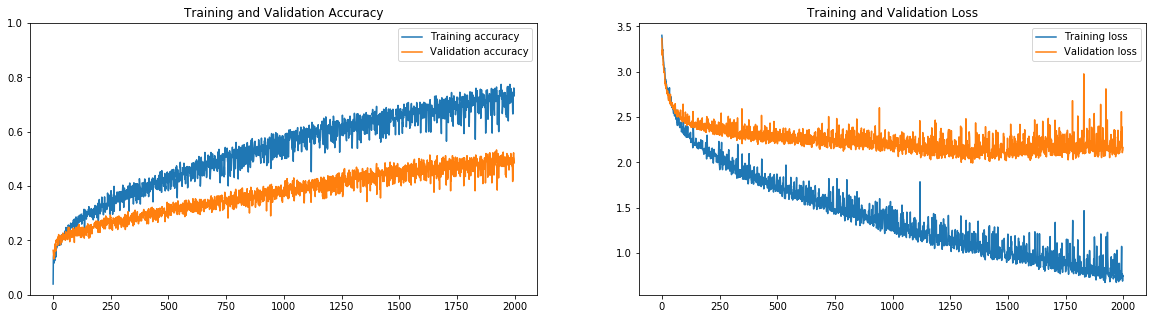

In [11]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.ylim(0,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and Validation Accuracy')
plt.legend(labels=['Training accuracy', 'Validation accuracy'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(labels=['Training loss', 'Validation loss'], loc='best')

plt.show()

In [12]:
model.save('LSTM_model.h5')